<a href="https://colab.research.google.com/github/ArmandoDLaRosa/data_science_for_business/blob/main/Classification_Evaluation_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Evaluation


In [123]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from typing import Tuple
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import binarize

In [109]:
def evaluate_threshold(threshold:np.ndarray) -> Tuple[int, ...]:
    """
    Receives threshold, returns (sensitivity, specificity)
    """
    return (tpr[thresholds > threshold][-1], 1 - fpr[thresholds > threshold][-1])

First let's follow this [tutorial](https://www.ritchieng.com/machine-learning-evaluate-classification-model/), with the data from this dataset in kaggle: [diabetes](https://www.kaggle.com/datasets/mathchi/diabetes-data-set).



**QUESTION TO SOLVE**

Can we predict the diabetes status of a patient given their health measurements?

In [7]:
df = pd.read_csv('/content/diabetes-1.csv')

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age']
X = df[feature_cols]
y = df["Outcome"]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_class = logreg.predict(X_test)
print(round(metrics.accuracy_score(y_test, y_pred_class),3)*100, '%')

67.7 %


## Distribution of Outcome


In [38]:
for data in [y_train, y_test]:
    print(data.value_counts())
    print("% of zero: ", round(1-data.mean(),2))    
    print("% of ones: ", round(data.mean(),2), '\n')

0    370
1    206
Name: Outcome, dtype: int64
% of zero:  0.64
% of ones:  0.36 

0    130
1     62
Name: Outcome, dtype: int64
% of zero:  0.68
% of ones:  0.32 



A dumb model saying 0, would be right 68% of the time. Meaning that the 67% we're getting should be improved.

## Evaluation 1: Classification Acurracy

This method **doesn't tell** 
- the distribution of response values.
- the type of errors of the classifier

In [44]:
# Null Accuracy
y_test.value_counts().head(1) / len(y_test)

0    0.677083
Name: Outcome, dtype: float64

In [45]:
# Real Values Vs Predicted by model
print('Real Values:', y_test.values[0:25])
print('Pred Values:', y_pred_class[0:25])

Real Values: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred Values: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


## Evaluation 2: Confusion Matrix
This method works perfect for multi-class problems

In [52]:
#               Predicted-0  Predicted-1
# Actual-0           TN          FP
# Actual-1           Fn          TP
#
# FP - Type I error
# FN - Type II errort

confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)

[[114  16]
 [ 46  16]]


In [70]:
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print(  "TP = ", TP, 
      "\nTN = ", TN,
      "\nFP = ", FP,
      "\nFN = ", FN)

TP =  16 
TN =  114 
FP =  16 
FN =  46


### Accuracy
Overall correctness

In [77]:
print('Manual Calculated Accuracy = ' , round((TP + TN) / float(TP + TN + FP + FN), 5))
print('Scikit Calculated Accuracy = ' , round(metrics.accuracy_score(y_test, y_pred_class), 5))

Manual Calculated Accuracy =  0.67708
Scikit Calculated Accuracy =  0.67708


### Error
Overall incorrectness


In [78]:
print('Manual Calculated Misclassification rate = ' , round((FP + FN) / float(TP + TN + FP + FN), 5))
print('Scikit Calculated Misclassification rate = ' , round(1 - metrics.accuracy_score(y_test, y_pred_class), 5))

Manual Calculated Misclassification rate =  0.32292
Scikit Calculated Misclassification rate =  0.32292


### Sensitivity
Recall - ActualValue is 1, how often prediction is correct?

In [79]:
print('Manual Calculated True Positive Rate = ' , round(TP / float(FN + TP),5))
print('Scikit Calculated True Positive Rate = ' , round(metrics.recall_score(y_test, y_pred_class),5))

Manual Calculated True Positive Rate =  0.25806
Scikit Calculated True Positive Rate =  0.25806


### Specificity
True Negative Rate - ActualValue is 0, how often prediction is correct?

In [81]:
print('Manual Calculated True Negative Rate = ' , round(TN / (TN + FP),5))

Manual Calculated True Negative Rate =  0.87692


### False Positive Rate
ActualValue is 0, how often prediction is incorrect?

In [91]:
print('Manual Calculated False Positive Rate = ' , round( FP / float(TN + FP), 5))
print('FP Rate = 1 - Scikit Specificity      = ',  round( 1 - TN / (TN + FP), 5)) 

Manual Calculated False Positive Rate =  0.12308
FP Rate = 1 - Scikit Specificity      =  0.12308


### Precision
Truly positive prediction

In [83]:
print('Manual Calculated Precision = ' , round(TP / float(TP + FP),5))
print('Scikit Calculated Precision = ' , round(metrics.precision_score(y_test, y_pred_class),5))

Manual Calculated Precision =  0.5
Scikit Calculated Precision =  0.5


## Fixing the Threshold of the Classifier
Fixing the threshold is usually done after you've chosen the best model, AUC/ROC let you evaluate the models without fixing first the treshold.

In [92]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

### ROC
It uses probability and not classifications

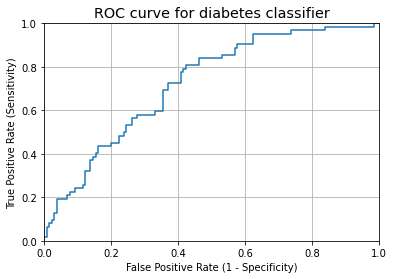

In [96]:
# roc_curve returns 
# thresholds: array
# fpr:        false positive rate
# tpr:        true positive rate

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [114]:
# To see how the thresholds are use to generate the ROC Curve

# 0.5 is the Starter threshold, later we will change it.
sensitivity, specificity = evaluate_threshold(0.5)
print(sensitivity, specificity)

0.25806451612903225 0.8769230769230769


### AUC
Area under the curve

In [115]:
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.7227047146401985


This metric is helpful to compare against other models, the higher the value the better. Useful to evaluate a model even when there's high class imbalance, which *classification accuracy* fails to be good at when there's high imbalance.

#### AUC, but cross validated

In [118]:
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.7425071225071225

### G-mean - Actually fixing the treshold
It's the geometric mean of sensitivity (known as recall) and specificity.

In [122]:
gmean = np.sqrt(tpr * (1 - fpr))

index = np.argmax(gmean)
thresholdOpt = round(thresholds[index], ndigits = 4)
gmeanOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

sensitivity, specificity = evaluate_threshold(thresholdOpt)
print('Sensitivity: {}, Specificity: {}'.format(sensitivity, specificity))

Best Threshold: 0.2531 with G-Mean: 0.6821
FPR: 0.4231, TPR: 0.8065
Sensitivity: 0.8064516129032258, Specificity: 0.5769230769230769


In [133]:
y_pred_class = binarize([y_pred_prob], threshold=thresholdOpt)[0]
metrics.confusion_matrix(y_test, y_pred_class)

array([[75, 55],
       [12, 50]])

## NOTES
Sensitivity & Specificity -
This are the things we want to maximize. In this example we manage to increase sensitivity, but we decreased specificity when we moved the threshold.